<a href="https://colab.research.google.com/github/dudaribeiro7/intro_modelagem_computacional_UFJF/blob/main/%5BMAC024%5D_T2_2022_1_Grupo_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificação da Equipe



Equipe C2

1. Camila Ribeiro Passos
2. Felipe da Costa Pinto Vilela
3. Maria Eduarda Ribeiro Facio

# Condições Gerais



Segundo trabalho de Introdução a Modelagem Computacional

## Da formação das equipes

1. As equipes serão formadas com até e 4 integrantes. 

2. Um dos integrantes será indentificado como correspondente responsável pela entrega do documentos necessários. Toda a comunicação com a equipe será feita por intermédio do correspondente.

3. As equipes devem ser formadas até às **18 horas o dia 22/07/2022** por meio do preenchimento da planilha [[MAC024] Composição das Equipes](https://docs.google.com/spreadsheets/d/1-7Wdno82aFGgCfY0z8oU5SCbwnbN_JV_LqB_ORGKHZQ/edit#gid=1609183693).

4. A formação das equipes pode ser acompanhada arquivo [[MAC024] Composição das Equipes](https://docs.google.com/spreadsheets/d/1-7Wdno82aFGgCfY0z8oU5SCbwnbN_JV_LqB_ORGKHZQ/edit#gid=1609183693). Cada equipe será indentificada por uma letra em ordem alfabética seguida do número 1 (A2, B2, C2, e assim por diante). O arquivo está aberto para edição e pode ser alterado pelos alunos até a data estipulada.

5. ***Os trabalhos serão atribuídos após a formação das equipe e somente ao correspondente que ficará responsável por repassar as informações demais aos integrantes.***

6. Para que seja feita a atribuição o mais rápido possível, assim que a equipe for formada o correspondente deve enviar um email para **leonardo.goliatt@ufjf.br** com o título *Criação da equipe X2* onde *X* é a identificação da equipe.

## Da avaliação

7. A avaliação será realizada por meio da entrega de um relatório com a contextualização da solução, explicação do desenvolvimento e os códigos desenvolvidos até a data estipulada.
 - O notebook do enunciado deverá ser usado para entrega do relatório
 - Cada questão deve conter a proposta de solução, com a explicação da metodologia empregada na solução
 
7. Os documentos necessários para a entrega do trabalho são (1) um relatório com a explicação das soluções e (2) os códigos desenvolvidos pela equipe. 
A equipe deve usar este modelo de notebook para desenvolver os códigos. Os pontos (1) e (2) podem ser entregues no notebook de enunciado.

9. A distribuição da pontuacão referente a cada ítem aparece no enunciado de 
cada proposicão.


## Dos prazos

10. Equipes formadas após a data estabelecida para a formação das equipes terão a nota da avaliação multiplicada por um coeficiente de **0.80**.

11. A equipe depe indicar no arquivo [[MAC024] Composição das Equipes](https://docs.google.com/spreadsheets/d/1-7Wdno82aFGgCfY0z8oU5SCbwnbN_JV_LqB_ORGKHZQ/edit#gid=1609183693) um responsável pela entrega do projeto.   Qualquer outro integrante da equipe não poderá entregar o trabalho exceto em casos de força maior.

12. A entrega dos projetos (relatórios e códigos) deve ocorrer até às **23:59 do dia 05/08/2022** na plataforma da disciplina pelo responsável pela entrega.

13. Entregas realizadas após a data estipulada terão a nota da avaliação multiplicada por um coeficiente de **0.80**, cumulativo com os coeficientes de outros atrasos caso ocorram.


## Disposições finais
14. Quaiquer dúvidas ou esclarecimentos devem ser encaminhadas pela sala de aula virtual.



# Importando pacotes:

In [ ]:
import math
import numpy as np
import pandas as pd
import pylab as pl
from scipy.stats import beta
import random
import matplotlib.pyplot as plt
import sympy as sp

#  Q1 (20 pontos)

Use o método de Monte Carlo para encontrar o volume da região $D$ limitada pelas superfícies 
$z=10-x^2/2-y^2$
e
$z=x^2+4y^2$.
Realize o experimento mais de uma vez de modo a apresentar um resultado medio acompanhado do desvio padrão.
Avalie o comportamento valor calculado para o volume ao variar a quantidade de
pontos usada no metodo de Monte Carlo.

## Proposta de solução:

A região D é limitada superiormente por $z = 10 - x²/2 - y²$ e inferiormente por $z = x² + 4y²$.

$\ \$

Igualando as duas equações, encontramos: $10-x²/2-y² = x²+4y²$, ou seja:
$$3x²/2 + 5y² = 10$$

Essa é a equação da sombra, no plano $xy$, da intersecção das duas superfícies, que vai definir os limites de integração para $x$ e $y$.

$\ \$

Para achar os extremos de $x$, basta igualar $y=0$:

$3x²/2 + 5*0² = 10 \ \ $, ou seja $ \ \ x = +- \sqrt{20/3}$. Então, $x$ varia no intervalo $$-\sqrt{20/3} \leq x \leq \sqrt{20/3}$$

$\ \$

E, para achar os extremos de $y$, iguala-se $x=0$, obtendo que $y$ varia no intervalo $$-\sqrt{2} \leq y \leq \sqrt{2}$$

$\ \$

Por fim, $z$, que varia no intervalo $x² + 4y² \leq z \leq 10 - x²/2 - y²$. Para achar seus extremos, igualamos $x=0$ e $y=0$, encontrando o intervalo $$0 \leq z \leq 10$$

In [ ]:
def f(x, y):
  return 10 - 3*pow(x, 2)/2 - 5*pow(y, 2)

In [ ]:
def mediaAritmetica(dados, n):
  soma = 0
  for i in range(0, n):
    soma += dados[i]
  media = soma / n
  return media

In [ ]:
def desvioPadrao(dados, n):
  media = mediaAritmetica(dados, n)
  somatorio = 0
  for i in range(0, n):
    somatorio += pow(dados[i] - media, 2)
  dp = math.sqrt(somatorio / n)
  return dp

In [ ]:
volumes = []

# número de iterações:
t = 100

# número de pontos a serem gerados:
n = 10000

# intervalo em que x varia:
a = -math.sqrt(20/3)
b = math.sqrt(20/3)

# intervalo em que y varia:
c = -math.sqrt(2)
d = math.sqrt(2)

# intervalo em que z varia:
M = 10

print("Número de Pontos \t Volume Aproximado")

for j in range(t):
  k = 0
  for i in range(n):
    x = np.random.uniform(low=a, high=b,size=1)
    y = np.random.uniform(low=c, high=d,size=1)
    z = np.random.uniform(low=0, high=M,size=1)
    if z <= f(x, y):
      k+=1
    
  V = M*(d-c)*(b-a)*k / n
  volumes.append(V)
  if((j+1)%10==0):
    print("\t", j+1, "\t\t     ", round(V, 4))

media = mediaAritmetica(volumes, t)
dp = desvioPadrao(volumes, t)

print("\nResultado médio acompanhado do desvio padrão: (", round(media, 2), "+-", round(dp, 2), ")")

Número de Pontos 	 Volume Aproximado
	 10 		      55.4733
	 20 		      56.2767
	 30 		      56.9924
	 40 		      57.4597
	 50 		      57.2553
	 60 		      58.0878
	 70 		      58.0586
	 80 		      56.7587
	 90 		      58.0148
	 100 		      57.8687

Resultado médio acompanhado do desvio padrão: ( 57.31 +- 0.71 )


# Q2 (20 pontos)

Suponha que duas variáveis aleatórias independentes sejam normalmente distribuídas, uma com média igual a 10, denominada $X$, e outra com média igual a 5, denominada $Y$, ambas com mesma variância igual a 9. Se combinássemos estas duas variáveis numa terceira denominada $W=\| X^3-Y^2\|$, avalie e justifique:

1. Use a tranformação de Box-Müller e esboce a distribuição de $X$ e $Y$.
2. Esboce a distribuição de $W$.
3. Qual é a probabilidade de que $W$ apresente valor igual ou menor a 500? 
4. Qual é a probabilidade de que $W$ apresente valores entre 550 e 700?

## Proposta de solução:

In [ ]:
# método da congruência linear para gerar numeros aleatorios
def mcl(x0, a=7**5, b=0, c=(2**31-1)):
    x1 = (a*x0 + b) % c
    return x1

N=100000
N2 = int(N/2)

u1, u2 = [], []

l,L =  0,1
x_k = 42
for i in range(N):
  
  x_k=mcl(x_k)                   # x_k \in [0,c]
  x = (L-l) * (x_k/2**31) + l    # x \in (l,L)
  u1.append(x)

  x_k=mcl(x_k)                   # x_x \in [0,c]
  y = (L-l) * (x_k/2**31) + l    # y \in (l,L)
  u2.append(y)  

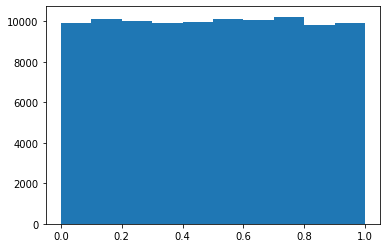

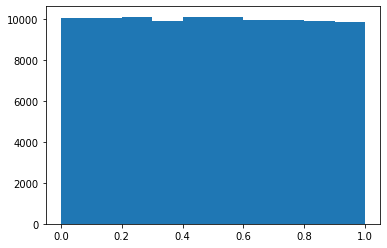

In [ ]:
pl.hist(u1, bins = 10); 
pl.show()
pl.hist(u2, bins=10);
pl.show()

**1- Esboço de X e Y:**

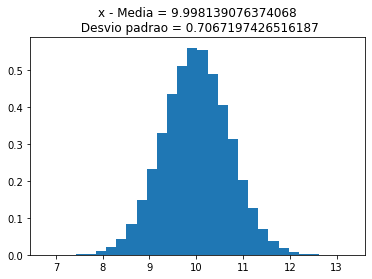

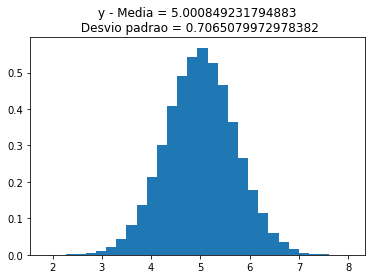

In [ ]:
R = [ math.sqrt( - math.log(u)) for u in u1]
theta = [ 2*math.pi*u for u in u2]

x = R*np.cos(theta)
y = R*np.sin(theta)

x = np.array(x) + 10
pl.hist(x, bins=30, label='x', density=True,)
pl.title('x - Media = '+str(x.mean())+'\n Desvio padrao = '+str(x.std()))
pl.show()

y = np.array(y) + 5
pl.hist(y, bins=30, label='y', density=True,)
pl.title('y - Media = '+str(y.mean())+'\n Desvio padrao = '+str(y.std()))
pl.show()

**2- Esboço de W:**

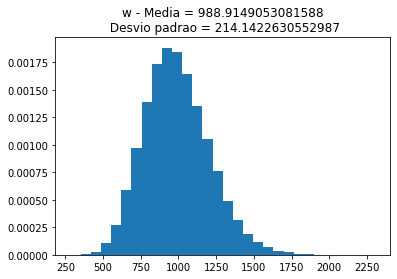

In [ ]:
w = abs(x**3 - y**2)

w = np.array(w)
pl.hist(w, bins=30, label='w', density=True,)
pl.title('w - Media = '+str(w.mean())+'\n Desvio padrao = '+str(w.std()))
pl.show()

**3- Probabilidade de que W apresente valor igual ou menor a 500:**

In [ ]:
cont = 0
for i in range(len(w)):
  if w[i] <= 500:
    cont += 1
  
prob = cont / len(w)
print("A probabilidade de que W apresente valor menor ou igual a 500 é de", round(prob*100, 2), "%.")

A probabilidade de que W apresente valor menor ou igual a 500 é de 0.3 %.


**4- Probabilidade de que W apresente valores entre 550 e 700:**

In [ ]:
cont = 0
for i in range(len(w)):
  if w[i] > 550 and w[i] < 700:
    cont += 1
  
prob = cont / len(w)
print("A probabilidade de que W apresente valor entre 550 e 700 é de", round(prob*100, 2), "%.")

A probabilidade de que W apresente valor entre 550 e 700 é de 6.76 %.


# Q3 (20 pontos)

Da urna A, 5 bolas são sorteadas com reposição. Seja  $X$ como o número de bolas azuis dentre as 5 sorteadas. Da urna B, 5 bolas são sorteadas com reposição, definindo-se $Y$ como o número de bolas azuis dentre as 5 sorteadas. 

1. Estime qual a probabilidade de que $X$ e $Y$ tenham o mesmo valor. Utilize mais do que 10000 simulações para obter boas estimativas. 

2. Estime a probabilidade da soma de bolas azuis ser igual a 4.

2. Estime a probabilidade da soma de bolas azuis ser maior ou igual que  6.



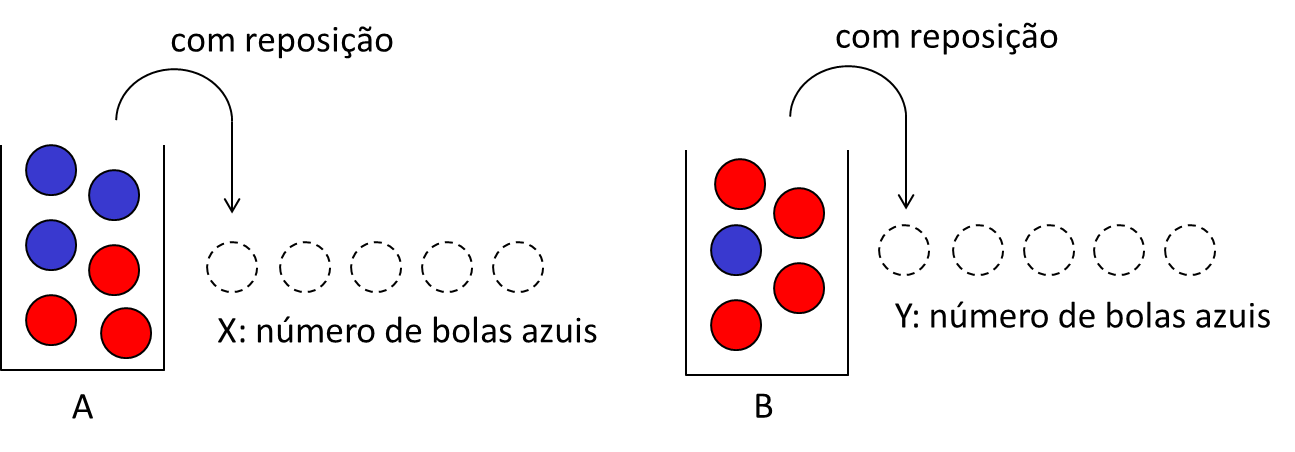

## Proposta de solução:

In [ ]:
def mediaAritmetica(dados, n):
  soma = 0
  for i in range(0, n):
    soma += dados[i]
  media = soma / n
  return media

In [ ]:
def desvioPadrao(dados, n):
  media = mediaAritmetica(dados, n)
  somatorio = 0
  for i in range(0, n):
    somatorio += pow(dados[i] - media, 2)
  dp = math.sqrt(somatorio / n)
  return dp

In [ ]:
def sorteio(urna, n_sorteadas):
  sorteado = []
  for i in range(n_sorteadas):
    sorteado.append(urna[random.randrange(len(urna))])
  cont = 0
  for i in range(len(sorteado)):
    if(sorteado[i] == "blue"):
      cont += 1
  return cont

In [ ]:
# Definição das bolas presentes em cada urna:
urnaA = ["red", "red", "red", "blue", "blue", "blue"]
urnaB = ["red", "red", "red", "red",  "blue"]

# Definição do número de bolas sorteadas em cada urna:
n_sorteadas = 5

**1- Probabilidade de que $X$ e $Y$ tenham o mesmo valor:**

In [ ]:
def probabilidade1(urnaA, urnaB, n_sorteadas):
  cont = 0
  n_sorteios = 10000
  for i in range(n_sorteios):
    if sorteio(urnaA, n_sorteadas) == sorteio(urnaB, n_sorteadas):
      cont += 1
  prob = cont / n_sorteios * 100
  return round(prob, 2)

In [ ]:
probs1 = []
n_simulacoes = 1000
for i in range(n_simulacoes):
  probs1.append(probabilidade1(urnaA, urnaB, n_sorteadas))

media1 = mediaAritmetica(probs1, n_simulacoes)
dp1 = desvioPadrao(probs1, n_simulacoes)
print("Concluiu-se, após mais de 10000 simulaçoes, que a probabilidade de que X e Y tenham o mesmo valor é de (", round(media1, 2), "+-", round(dp1, 2), ")%.")

Concluiu-se, após mais de 10000 simulaçoes, que a probabilidade de que X e Y tenham o mesmo valor é de ( 15.51 +- 0.35 )%.


**2- Probabilidade da soma de bolas azuis ser igual a 4:**

In [ ]:
def probabilidade2(urnaA, urnaB, n_sorteadas):
  cont = 0
  n_sorteios = 10000
  for i in range(n_sorteios):
    if sorteio(urnaA, n_sorteadas) + sorteio(urnaB, n_sorteadas) == 4:
      cont += 1
  prob = cont / n_sorteios * 100
  return round(prob, 2)

In [ ]:
probs2 = []
n_simulacoes = 1000
for i in range(n_simulacoes):
  probs2.append(probabilidade2(urnaA, urnaB, n_sorteadas))

media2 = mediaAritmetica(probs2, n_simulacoes)
dp2 = desvioPadrao(probs2, n_simulacoes)
print("Concluiu-se, após mais de 10000 simulaçoes, que a probabilidade de que a soma de bolas azuis seja igual a 4 é de (", round(media2, 2), "+-", round(dp2, 2), ")%.")

Concluiu-se, após mais de 10000 simulaçoes, que a probabilidade de que a soma de bolas azuis seja igual a 4 é de ( 25.11 +- 0.42 )%.


**3- Probabilidade da soma de bolas azuis ser maior ou igual que 6:**

In [ ]:
def probabilidade3(urnaA, urnaB, n_sorteadas):
  cont = 0
  n_sorteios = 10000
  for i in range(n_sorteios):
    if sorteio(urnaA, n_sorteadas) + sorteio(urnaB, n_sorteadas) >= 6:
      cont += 1
  prob = cont / n_sorteios * 100
  return round(prob, 2)

In [ ]:
probs3 = []
n_simulacoes = 1000
for i in range(n_simulacoes):
  probs3.append(probabilidade3(urnaA, urnaB, n_sorteadas))

media3 = mediaAritmetica(probs3, n_simulacoes)
dp3 = desvioPadrao(probs3, n_simulacoes)
print("Concluiu-se, após mais de 10000 simulaçoes, que a probabilidade de que a soma de bolas azuis seja maior ou igual a 6 é de (", round(media3, 2), "+-", round(dp3, 2), ")%.")

Concluiu-se, após mais de 10000 simulaçoes, que a probabilidade de que a soma de bolas azuis seja maior ou igual a 6 é de ( 8.23 +- 0.27 )%.


# Q4 (20 pontos)

Uma confraternização que você está organizando terá 64 convidados e você precisa preparar os sanduíches para serem servidos.
Você acredita que cada convidado  comerá 0, 1, 2 ou 3 sanduíches com probabilidades de 10%, 50%, 30% e 10%, respectivamente. Assuma que o número de sanduíches que cada convidado irá comer seja
independente de qualquer outro convidado. 

1. Use o método de Monte Carlo para estimar quantos sanduíches você deve preparar para ter uma confiança de 95% de que não faltará sanduíches para os convidados.
O intervalo de confiança a 95% é dado por $\bar{x}+ 1.96 \sigma/\sqrt{n}$ onde $\bar{x}$ é a media da população, $\sigma $ o desvio padrão e $n$ o tamanho da amostra.

2. De todos os convidados, 16 pessoas não deram certeza se comparecerão a confraternização, mas gostariam de estar presentes. Proponha uma estratégia para esta situação e recalcule a quantidade de sanduíches, discutindo o resultado.

## Proposta de solução - parte 1:

In [ ]:
def mediaAritmetica(dados, n):
  soma = 0
  for i in range(0, n):
    soma += dados[i]
  media = soma / n
  return media

In [ ]:
def desvioPadrao(dados, n):
  media = mediaAritmetica(dados, n)
  somatorio = 0
  for i in range(0, n):
    somatorio += pow(dados[i] - media, 2)
  dp = math.sqrt(somatorio / n)
  return dp

In [ ]:
# Função que define a quantidade de sanduiches consumidos pela probabilidade de consumo:
def probabilidade_sanduiche(m, prob_random):
  prob = np.array([0.1, 0.5, 0.3, 0.1])
  x = prob_random[m]
  if 0 < x <= prob[0]:
    return 0
  elif prob[0] < x <= (prob[0] + prob[1]):
    return 1
  elif (prob[0] + prob[1]) < x <= (prob[0] + prob[1] + prob[2]):
    return 2
  elif (prob[0] + prob[1] + prob[2]) < x <= 1:
    return 3

In [ ]:
# Método da congruência linear para gerar numeros aleatorios
def mcl(x0, a=7**5, b=0, c=(2**31-1)):
    x1 = (a*x0 + b) % c
    return x1

N = 10000
prob_random = []
l,L =  0,1
x_k = 43
for i in range(N):
  
  x_k = mcl(x_k)                   
  x = (L-l) * (x_k/2**31) + l    
  prob_random.append(x)

prob_random = tuple(prob_random)

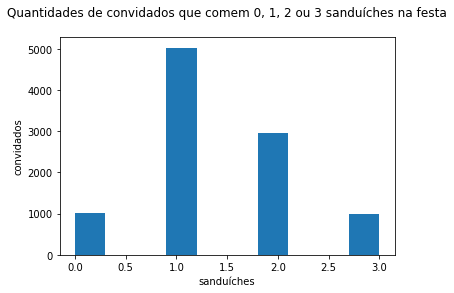

In [ ]:
# Histograma:
x = [probabilidade_sanduiche(i, prob_random) for i in range(N)]
pl.hist(x)
pl.title("Quantidades de convidados que comem 0, 1, 2 ou 3 sanduíches na festa\n")
pl.xlabel("sanduíches")
pl.ylabel("convidados")
pl.show()

In [ ]:
c0, c1, c2, c3, total = 0, 0, 0, 0, 0

for i in x:
  if i == 0:
    c0 += 1

  elif i == 1:
    c1 += 1

  elif i == 2:
    c2 += 1

  elif i == 3:
    c3 += 1


print("Em uma amostra de", N, "convidados:\n")
print(c0, "pessoas comeram 0 sanduíches, ou seja,", c0/N*100, "% dos convidados.")
print(c1, "pessoas comeram 1 sanduíches, ou seja,", c1/N*100, "% dos convidados.")
print(c2, "pessoas comeram 2 sanduíches, ou seja,", c2/N*100, "% dos convidados.")
print(c3, "pessoas comeram 3 sanduíches, ou seja,", c3/N*100, "% dos convidados.")
print("\n")
media = mediaAritmetica(x, N)
dp = desvioPadrao(x, N)
print("A média de consumos foi de", media, "sanduíches por pessoa.")
print("O desvio padrão da média foi de", dp)

Em uma amostra de 10000 convidados:

1015 pessoas comeram 0 sanduíches, ou seja, 10.15 % dos convidados.
5030 pessoas comeram 1 sanduíches, ou seja, 50.3 % dos convidados.
2954 pessoas comeram 2 sanduíches, ou seja, 29.54 % dos convidados.
1001 pessoas comeram 3 sanduíches, ou seja, 10.01 % dos convidados.


A média de consumos foi de 1.3941 sanduíches por pessoa.
O desvio padrão da média foi de 0.8012397830862511


Sabendo que o intervalo de confiança a 95% é dado por $\bar{x}+ 1.96 \sigma/\sqrt{n}$ onde $\bar{x}$ é a media da população, $\sigma $ o desvio padrão e $n$ o tamanho da amostra, tem-se:

In [ ]:
int_conf = media + 1.96 * dp / math.sqrt(N)
print("O intervalo de confiança a 95% é", int_conf)
print("Ou seja, cada convidado consome uma média de", round(int_conf, 2), "sanduíches.")
print("Esse resultado foi obtido na simulação ampliada utilizando o método de Monte Carlo.")

O intervalo de confiança a 95% é 1.4098042997484903
Ou seja, cada convidado consome uma média de 1.41 sanduíches.
Esse resultado foi obtido na simulação ampliada utilizando o método de Monte Carlo.


Utilizando o mesmo intervalo de confiança para o caso de 64 convidados...

In [ ]:
n = 64
quant = int_conf * n
print("Devem ser preparados", round(quant+0.5), "sanduíches para", n, "convidados para que se tenha uma confiança de 95% de que não faltarão sanduíches para os convidados.")

Devem ser preparados 91 sanduíches para 64 convidados para que se tenha uma confiança de 95% de que não faltarão sanduíches para os convidados.


## Proposta de solução - parte 2:

16 pessoas não deram certeza se comparecerão à confraternização, mas gostariam de estar presentes. Caso alguma(s) delas realmente não apareça(m), teremos a seguinte situação:

In [ ]:
confirmados = 48
nao_confirmados = 16

In [ ]:
quant1 = int_conf * confirmados
print("Primeiramente, devem ser preparados, com certeza,", round(quant1+0.5), "sanduíches para os", confirmados, "convidados que já confirmaram presença, com")
print("95% de confiança de que não faltarão sanduíches para esses convidados.")

Primeiramente, devem ser preparados, com certeza, 68 sanduíches para os 48 convidados que já confirmaram presença, com
95% de confiança de que não faltarão sanduíches para esses convidados.


Como os convidados não confirmados gostariam de estar presentes, a chance de irem é maior do que a de não irem. Logo, estima-se que a probabilidade de comparecerem à festa é de 70% e a de não comparecerem é de 30%.

In [ ]:
def estaPresente(m, prob_random):
  prob = np.array([0.3, 0.7])
  x = prob_random[m]
  if 0 < x <= prob[0]:
    return 0 #ausente
  elif prob[0] < x <= 1:
    return 1 #presente

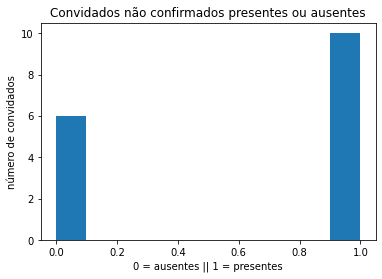

In [ ]:
# Histograma:
y = [estaPresente(i, prob_random) for i in range(nao_confirmados)]
pl.hist(y)
pl.title("Convidados não confirmados presentes ou ausentes")
pl.xlabel("0 = ausentes || 1 = presentes")
pl.ylabel("número de convidados")
pl.show()

In [ ]:
presente, ausente = 0, 0

for i in y:
  if i == 0:
    ausente += 1

  elif i == 1:
    presente += 1

presente, ausente

(10, 6)

In [ ]:
quant2 = int_conf * presente

print("Devem ser preparados mais", round(quant2+0.5), "sanduiches para os", nao_confirmados, "convidados que não confirmaram presença, considerando que alguns deles devem comparecer e outros não.")

Devem ser preparados mais 15 sanduiches para os 16 convidados que não confirmaram presença, considerando que alguns deles devem comparecer e outros não.


In [ ]:
print("Dessa forma, devem ser preparados", round(quant1+0.5) + round(quant2+0.5), "sanduíches no total para essa nova situação, na qual", nao_confirmados, "convidados não confirmaram presença.")

Dessa forma, devem ser preparados 83 sanduíches no total para essa nova situação, na qual 16 convidados não confirmaram presença.


# Q5 (20 pontos)


Uma mola helicoidal é  uma barra prismática enrolada em torno de um clindro circular de raio constante. Um exemplo é   mostrado abaixo.
Seja $d$ o diâmetro de uma barra de seção circular, 
e seja $D$ o diâmetro de uma espira onde $n$ é o número de espiras, e $\alpha$
o ângulo de inclinação da espira com  a horizontal.
As extremidades da barra estão localizadas no centro da espira estão
submetidas a uma força $P$. 

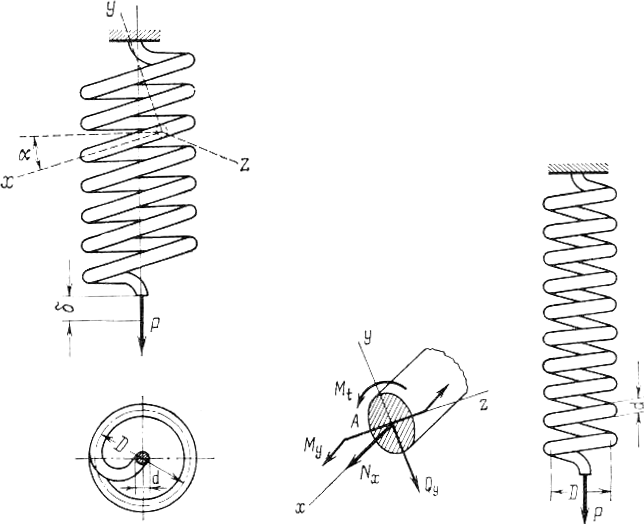

Os esforços internos em cada seção da barra se reduzem a um esforço normal constante $N_x=P\sin\alpha$,
a um esforço cisalhante $Q_y=P\sin\alpha$,  a um momento de torsão $M_t=PR\cos\alpha$ e a um momento fletor
$M_y=PR\sin\alpha$.


O ponto mais solicitado da seção é o ponto $A$ da superfície interior da espira.
Neste ponto, temos as seguintes tensões normais e de cisalhamento:
$$
 \begin{matrix}
\sigma &=& \displaystyle\frac{N_x}{A} + \frac{M_y}{W} &=& \displaystyle\frac{16PD}{\pi d^3}\left( 1+ \frac{d}{4D}\right) \sin\alpha\\\\
\tau   &=& \displaystyle\frac{Q_y}{A} + \frac{M_t}{W_p} &=& \displaystyle\frac{8PD}{\pi d^3}\left( 1+ \frac{d}{2D}\right) \cos \alpha 
 \end{matrix}
$$


A condição de resistência é $\sqrt{\sigma^2+4\tau^2} \le \overline{\sigma}$, onde $\overline{\sigma}$ é a 
tensão limite do material. 


O deslocamento na extremidade livre da mola é dado por
$$
 \delta = \frac{8PD^3n}{d^4 \cos\alpha} 
\left[  
2\left( 1+ \frac{d^2}{4D^2}  \right)   \frac{\sin^2\alpha}{E}
+
\left( 1+ \frac{d^2}{2D^2}  \right)   \frac{\cos^2\alpha}{EG} 
\right]
$$
onde $E$ e $G$ são os módulos de elasticidade longitudinal e transversal do material.



Considere uma linha fabril que produz molas helicoidais. Devido a problemas de desgaste das 
máquinas envolvidas na produção e fatores humanos, os componentes são produzidos dentro dos seguintes
limites de variação.
O diâmetro externo varia uniformemente em torno do de
$D= 70 \pm 1$ mm.
Os seguintes parâmetros têm variação com distribuição normal como segue: 
$d= 20 \pm 1$ mm, 
$\alpha= 12 \pm 2$ graus e $n=12$ espiras.
O material fornecido apresenta as seguintes variações (com distribuição normal):
$E= 200 \pm 3$ GPa e
$G= 80 \pm 1$ GPa.

1. Forneça uma gráfico com a variação do deslocamento  da mola, 
mostrando sua média e desvio padrão, sabendo que as carga de
serviço máxima é $10.6$ kN. 

2. Para uma carga de $9.4$ kN, qual a probabilidade de falha da mola sabendo que a tensão limite do material
é $620$ MPa.


## Proposta de solução parte 1:

Representação das formulas:

In [ ]:
d, D, alpha, G, E, P, n = sp.var('d D alpha G E P n')
display((8*P*D**3*n)/(d**4*sp.cos(alpha)) * ((2)*(1+d**2/(4*D**2))*((sp.sin(alpha))**2)/E+(1+d**2/(2*D**2))*(sp.cos(alpha))**2/(E*G)))
display(16 * P * D / (sp.pi*d**3) * (1 + d / (4 * D)) * sp.sin(alpha))
display(8 * P * D / (sp.pi*d**3) * (1 + d / (2 * D)) * sp.cos(alpha))

8*D**3*P*n*((2 + d**2/(2*D**2))*sin(alpha)**2/E + (1 + d**2/(2*D**2))*cos(alpha)**2/(E*G))/(d**4*cos(alpha))

16*D*P*(1 + d/(4*D))*sin(alpha)/(pi*d**3)

8*D*P*(1 + d/(2*D))*cos(alpha)/(pi*d**3)

In [ ]:
N=100000
n = 12

D = np.random.uniform(low = 69*10**(-3), high = 71*10**(-3), size=N)
d = np.random.normal(loc = 20*10**(-3), scale = 1*10**(-3), size=N)
alpha  = np.random.normal(loc = 12*np.pi/180, scale = 2*np.pi/180, size=N)
E = np.random.normal(loc = 200*10**9, scale = 3*10**9, size=N)
G = np.random.normal(loc = 80*(10**9), scale = (10**9), size=N)
P = 10.6*10**3

Media = 0.001037951299190805
Desvio padrao = 0.00040949758452131014


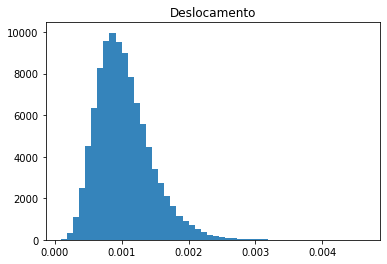

In [ ]:
deslocamento = (8*P*D**3*n)/(d**4*np.cos(alpha))*(2*(1+d**2/(4*D**2))*((np.sin(alpha))**2)/E+(1+d**2/(2*D**2))*(np.cos(alpha))**2/(E*G))

print('Media = '+ str(deslocamento.mean()) + '\nDesvio padrao = ' + str(deslocamento.std()))

pl.hist(deslocamento, bins=50, alpha=0.9)
pl.title('Deslocamento')
pl.show()

## Proposta de solução parte 2:

In [ ]:
sigma_lim = 620 * 10**6
P = 9.4*10**3

sigma = 16 * P * D / (np.pi*d**3) * (1 + d / (4 * D)) * np.sin(alpha)
tau = 8 * P * D / (np.pi*d**3) * (1 + d / (2 * D)) * np.cos(alpha)

print('A probabilidade de falha da mola é de', round(sum(np.sqrt(sigma**2 + 4 * tau**2) > sigma_lim) / N * 100, 2), '%')

A probabilidade de falha da mola é de 4.22 %
